In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
INPUT = 'image.png'
OUT_DIR = 'out_images'
os.makedirs(OUT_DIR, exist_ok=True)

def imshow_cv(img, title=None, cmap=None):
    plt.figure(figsize=(6,6))
    if cmap == 'gray' or img.ndim == 2: 
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

def save_img(path, img):
    cv2.imwrite(path, img)
    print(f'Saved: {path}')

Original image shape (h, w, c): (1024, 1024, 3)


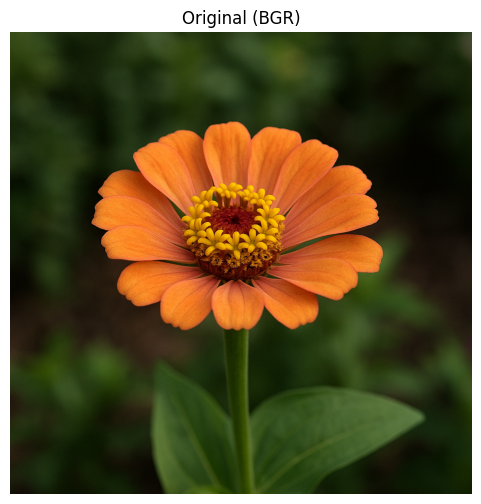

Saved: out_images\step1_original.png


In [ ]:
img = cv2.imread(INPUT, cv2.IMREAD_COLOR)
if img is None:
    raise FileNotFoundError(f'Could not find or open {INPUT}. Place the file next to this notebook.')
print('Original image shape (h, w, c):', img.shape)
imshow_cv(img, title='Original (BGR)')
save_img(os.path.join(OUT_DIR, 'step1_original.png'), img)

Resized shape: (614, 614, 3)


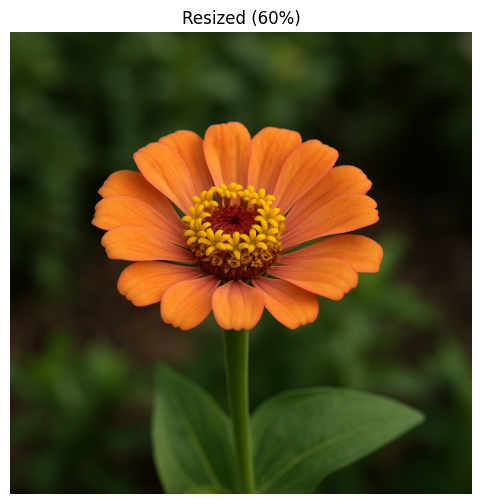

Saved: out_images\step2_resized.png


In [ ]:
scale = 0.6
resized = cv2.resize(img, (0,0), fx=scale, fy=scale, interpolation=cv2.INTER_AREA)
print('Resized shape:', resized.shape)
imshow_cv(resized, title='Resized (60%)')
save_img(os.path.join(OUT_DIR, 'step2_resized.png'), resized)

Grayscale shape: (614, 614)


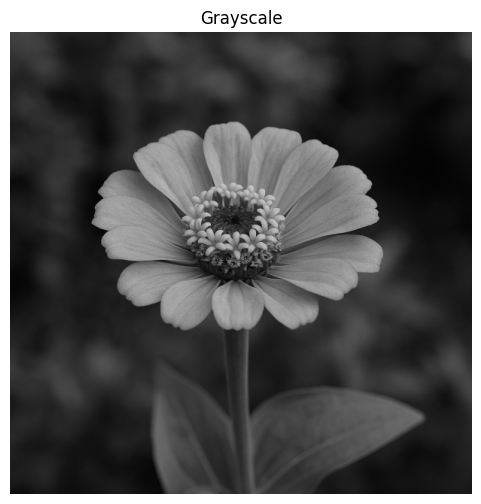

Saved: out_images\step3_gray.png


In [4]:
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
print('Grayscale shape:', gray.shape)
imshow_cv(gray, title='Grayscale', cmap='gray')
save_img(os.path.join(OUT_DIR, 'step3_gray.png'), gray)

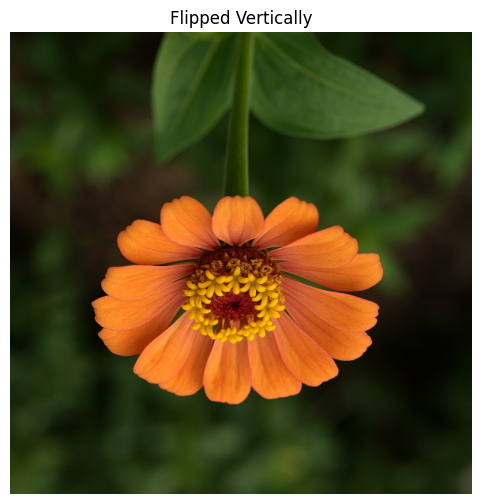

Saved: out_images\step4_flipped.png


In [5]:
flipped = cv2.flip(resized, 0)  # 0 flips around the x-axis (vertical flip)
imshow_cv(flipped, title='Flipped Vertically')
save_img(os.path.join(OUT_DIR, 'step4_flipped.png'), flipped)

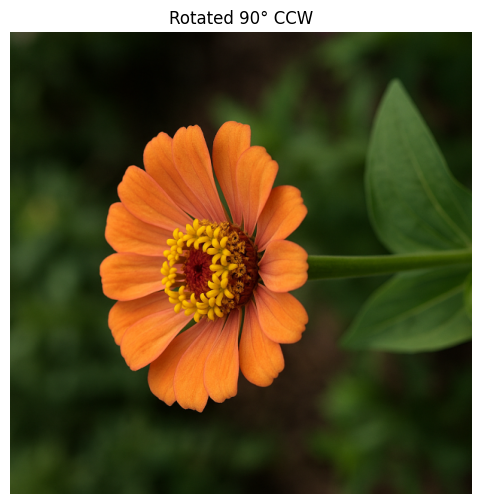

Saved: out_images\step5_rotated.png


In [ ]:
rotated = cv2.rotate(resized, cv2.ROTATE_90_COUNTERCLOCKWISE)
imshow_cv(rotated, title='Rotated 90° CCW')
save_img(os.path.join(OUT_DIR, 'step5_rotated.png'), rotated)

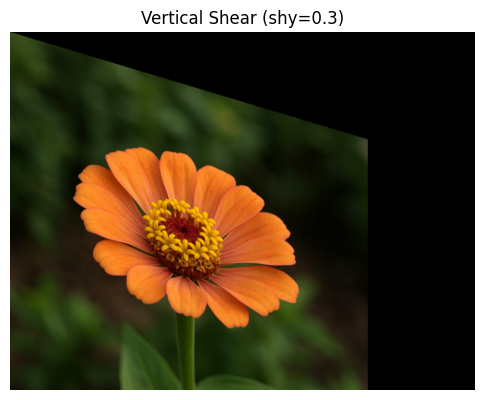

Saved: out_images\step6_sheared.png


In [ ]:
shy = 0.3  # shear factor (positive -> lower rows shift)
h, w = resized.shape[:2]
M = np.float32([[1, 0, 0], [shy, 1, 0]])
new_w = int(w + abs(shy) * h)
sheared = cv2.warpAffine(resized, M, (new_w, h))
imshow_cv(sheared, title=f'Vertical Shear (shy={shy})')
save_img(os.path.join(OUT_DIR, 'step6_sheared.png'), sheared)

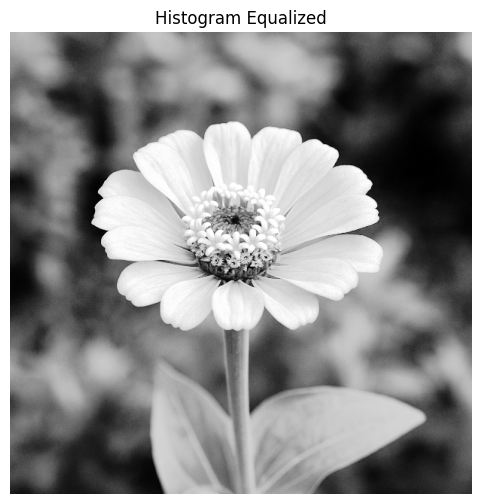

Saved: out_images\step7_equalized.png


In [ ]:
equalized = cv2.equalizeHist(gray)
imshow_cv(equalized, title='Histogram Equalized', cmap='gray')
save_img(os.path.join(OUT_DIR, 'step7_equalized.png'), equalized)

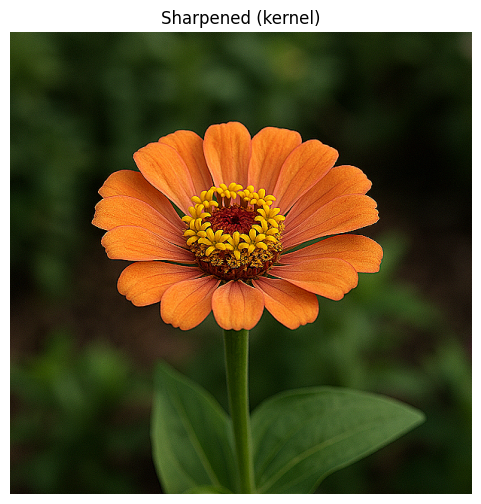

Saved: out_images\step8_sharpened.png


In [ ]:
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]], dtype=np.float32)
sharpened = cv2.filter2D(resized, -1, kernel)
imshow_cv(sharpened, title='Sharpened (kernel)')
save_img(os.path.join(OUT_DIR, 'step8_sharpened.png'), sharpened)